In [1]:
import pandas as pd
import numpy as np
import scipy
import scipy.stats

In [5]:
df = pd.read_csv('bicicletas-compartidas.csv')

In [7]:
df.columns

Index(['fecha', 'bicis-compartidas', 'temp-obs', 'sens-temp', 'hum', 'viento',
       'codigo-clima', 'festivo', 'findesemana', 'cuartil-ano'],
      dtype='object')

In [11]:
# frecuencias categoricas
ycat = df['cuartil-ano']
ycat = ycat.apply(lambda x: 'Cat-' + str(int(x)))
ycat.head()

0    Cat-3
1    Cat-3
2    Cat-3
3    Cat-3
4    Cat-3
Name: cuartil-ano, dtype: object

In [16]:
#frecuencias asociadas a esta primera variable
valores, conteo_freq = np.unique(ycat, return_counts = True)
valores, conteo_freq

tabla_frecuencias = dict( zip(valores, conteo_freq) )
tabla_frecuencias

{'Cat-0': 4394, 'Cat-1': 4387, 'Cat-2': 4303, 'Cat-3': 4330}

In [18]:
#los mismos calculos para una variable numerica
ynum = df['viento'].copy()
np.min(ynum), np.max(ynum)

(0.0, 56.5)

In [21]:
np.percentile(ynum, q=50)

15.0

In [22]:
np.median(ynum)

15.0

In [23]:
valores = [0,25,50,75,100]
np.percentile( ynum, q = valores )

array([ 0. , 10. , 15. , 20.5, 56.5])

In [24]:
valores = [0,20,40,60,80,100]
np.percentile( ynum, q = valores )

array([ 0. ,  9. , 13. , 17. , 22. , 56.5])

In [26]:
valores = list(range(0,110,10))
np.percentile( ynum, q = valores )

array([ 0. ,  6.5,  9. , 11. , 13. , 15. , 17. , 19.5, 22. , 27. , 56.5])

In [27]:
y = df['bicis-compartidas']
y.describe()

count    17414.000000
mean      1143.101642
std       1085.108068
min          0.000000
25%        257.000000
50%        844.000000
75%       1671.750000
max       7860.000000
Name: bicis-compartidas, dtype: float64

In [28]:
#outlier valor que caiga por fuera del rango
Q1 = np.percentile( ynum, q = 25 )
Q3 = np.percentile( ynum, q = 75 )

RI = Q3 - Q1

lim_inf = Q1-1.5*RI
lim_sup = Q3+1.5*RI

[lim_inf, lim_sup]

[-5.75, 36.25]

In [31]:
!pip install matplotlib

     |████████████████████████████████| 11.6 MB 8.5 MB/s eta 0:00:01
     |████████████████████████████████| 92 kB 98 kB/s  eta 0:00:01
     |████████████████████████████████| 2.2 MB 4.5 MB/s eta 0:00:01


In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([8.274e+03, 4.416e+03, 2.355e+03, 1.241e+03, 5.610e+02, 4.710e+02,
        8.800e+01, 2.000e+00, 3.000e+00, 3.000e+00]),
 array([   0.,  786., 1572., 2358., 3144., 3930., 4716., 5502., 6288.,
        7074., 7860.]),
 <BarContainer object of 10 artists>)

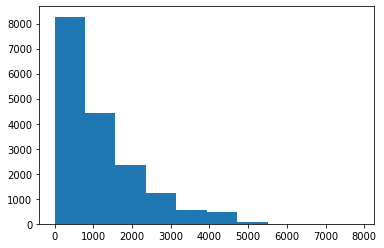

In [33]:
plt.hist(y)

In [34]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bicis-compartidas,17414.0,1143.101642,1085.108068,0.0,257.0,844.0,1671.75,7860.0
temp-obs,17414.0,12.468091,5.571818,-1.5,8.0,12.5,16.00,34.0
sens-temp,17414.0,11.520836,6.615145,-6.0,6.0,12.5,16.00,34.0
hum,17414.0,72.324954,14.313186,20.5,63.0,74.5,83.00,100.0
viento,17414.0,15.913063,7.894570,0.0,10.0,15.0,20.50,56.5
codigo-clima,17414.0,2.722752,2.341163,1.0,1.0,2.0,3.00,26.0
festivo,17414.0,0.022051,0.146854,0.0,0.0,0.0,0.00,1.0
findesemana,17414.0,0.285403,0.451619,0.0,0.0,0.0,1.00,1.0
cuartil-ano,17414.0,1.492075,1.118911,0.0,0.0,1.0,2.00,3.0


In [35]:
y.describe().T

count    17414.000000
mean      1143.101642
std       1085.108068
min          0.000000
25%        257.000000
50%        844.000000
75%       1671.750000
max       7860.000000
Name: bicis-compartidas, dtype: float64

In [36]:
df['cuartil-ano'].value_counts()

0.0    4394
1.0    4387
3.0    4330
2.0    4303
Name: cuartil-ano, dtype: int64

In [37]:
ycat.value_counts()

Cat-0    4394
Cat-1    4387
Cat-3    4330
Cat-2    4303
Name: cuartil-ano, dtype: int64

In [38]:
df['cuartil-ano'].value_counts().sort_index()

0.0    4394
1.0    4387
2.0    4303
3.0    4330
Name: cuartil-ano, dtype: int64